In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:\PLACEMENTS\projects\Covid19_New\case_time_series.csv", parse_dates = ['Date'], index_col='Date')
df

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,
2020-01-30,30-01-2020,1,1,0,0,0,0
2020-01-31,31-01-2020,0,1,0,0,0,0
2020-02-01,01-02-2020,0,1,0,0,0,0
2020-02-02,02-02-2020,1,2,0,0,0,0
2020-02-03,03-02-2020,1,3,0,0,0,0
...,...,...,...,...,...,...,...
2021-08-03,03-08-2021,42530,31767766,36552,30925183,561,425198
2021-08-04,04-08-2021,42797,31810563,41873,30967056,532,425730
2021-08-05,05-08-2021,45005,31855568,40906,31007962,465,426195


#EXTRACTING 5 MONTHS DATA:

In [3]:
Data = df.loc['2021-03-01':'2021-07-31']
Data

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,
2021-03-01,01-03-2021,12270,11124248,12472,10796873,92,156695
2021-03-02,02-03-2021,14998,11139246,13113,10809986,98,156793
2021-03-03,03-03-2021,17425,11156671,14071,10824057,87,156880
2021-03-04,04-03-2021,16824,11173495,13788,10837845,113,156993
2021-03-05,05-03-2021,18324,11191819,14186,10852031,109,157102
...,...,...,...,...,...,...,...
2021-07-27,27-07-2021,42971,31483244,41653,30655426,641,421464
2021-07-28,28-07-2021,43165,31526409,38537,30693963,640,422104
2021-07-29,29-07-2021,44671,31571080,42115,30736078,549,422653


#Copied Data to New Variable

In [4]:
India_data = Data.copy()
India_data = India_data.reset_index()
India_data

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2021-03-01,01-03-2021,12270,11124248,12472,10796873,92,156695
1,2021-03-02,02-03-2021,14998,11139246,13113,10809986,98,156793
2,2021-03-03,03-03-2021,17425,11156671,14071,10824057,87,156880
3,2021-03-04,04-03-2021,16824,11173495,13788,10837845,113,156993
4,2021-03-05,05-03-2021,18324,11191819,14186,10852031,109,157102
...,...,...,...,...,...,...,...,...
148,2021-07-27,27-07-2021,42971,31483244,41653,30655426,641,421464
149,2021-07-28,28-07-2021,43165,31526409,38537,30693963,640,422104
150,2021-07-29,29-07-2021,44671,31571080,42115,30736078,549,422653
151,2021-07-30,30-07-2021,41499,31612579,37320,30773398,598,423251


In [5]:
India_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             153 non-null    datetime64[ns]
 1   Date_YMD         153 non-null    object        
 2   Daily Confirmed  153 non-null    int64         
 3   Total Confirmed  153 non-null    int64         
 4   Daily Recovered  153 non-null    int64         
 5   Total Recovered  153 non-null    int64         
 6   Daily Deceased   153 non-null    int64         
 7   Total Deceased   153 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 9.7+ KB


#Getting Month_Day from Date :

In [6]:
India_data['month_day'] = India_data['Date'].apply(lambda x: x.strftime('%B-%d'))
India_data['month_day']

0      March-01
1      March-02
2      March-03
3      March-04
4      March-05
         ...   
148     July-27
149     July-28
150     July-29
151     July-30
152     July-31
Name: month_day, Length: 153, dtype: object

#Grouping Month_Day by Total Confirmed Cases : 

In [7]:
df_tconfirmed = India_data.groupby('month_day', sort=False).sum()['Total Confirmed'].reset_index()
df_tconfirmed

,month_day,Total Confirmed
0,March-01,11124248
1,March-02,11139246
2,March-03,11156671
3,March-04,11173495
4,March-05,11191819
...,...,...
148,July-27,31483244
149,July-28,31526409
150,July-29,31571080
151,July-30,31612579


## Total Confirmed Cases in India

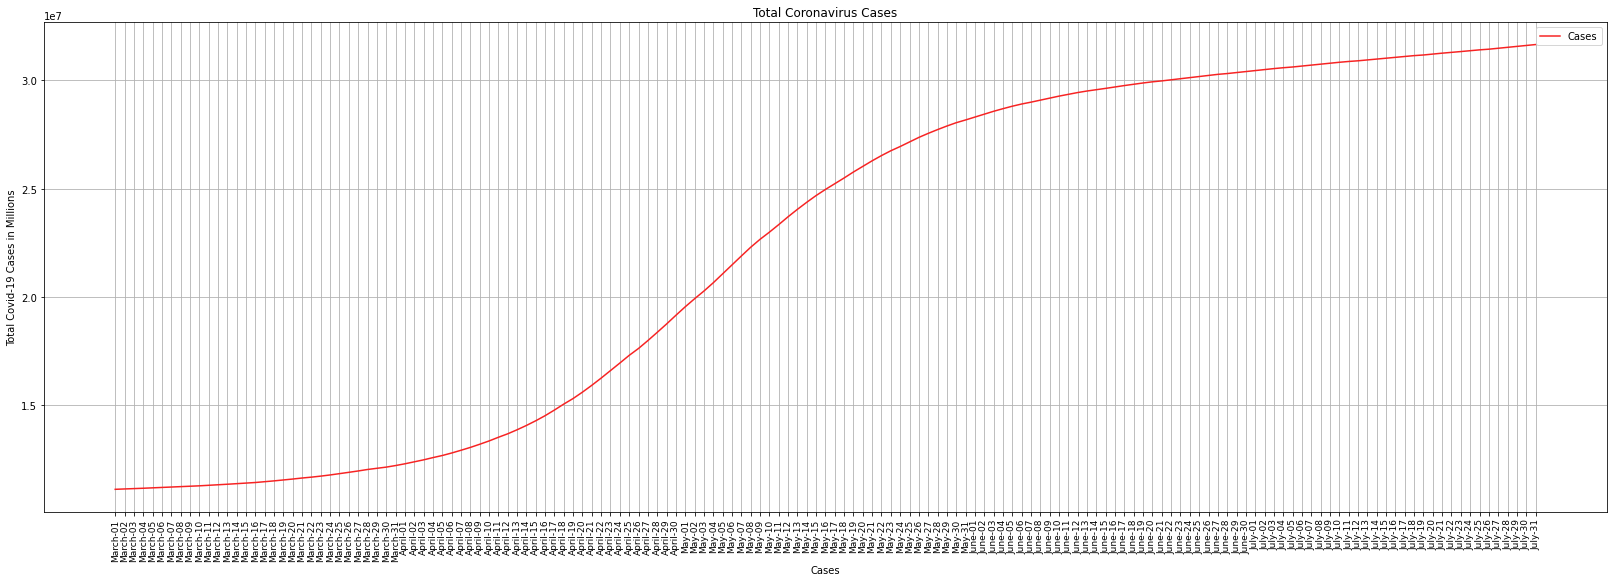

In [42]:
#setting the figure size and plotting graph
plt.figure(figsize=(28, 9))
plt.plot(df_tconfirmed['month_day'], df_tconfirmed['Total Confirmed'], color='#f72323', label='Cases')
plt.xticks(rotation='vertical', size=9)
plt.xlabel('Cases')
plt.ylabel('Total Covid-19 Cases in Millions')
plt.title('Total Coronavirus Cases')
plt.legend()
plt.grid(True)
plt.show()

#Grouping Month_day by Daily Confirmed Cases :

In [12]:
df_Dailyc = India_data.groupby('month_day', sort=False).sum()['Daily Confirmed'].reset_index()
df_Dailyc

,month_day,Daily Confirmed
0,March-01,12270
1,March-02,14998
2,March-03,17425
3,March-04,16824
4,March-05,18324
...,...,...
148,July-27,42971
149,July-28,43165
150,July-29,44671
151,July-30,41499


## Daily New Cases in India

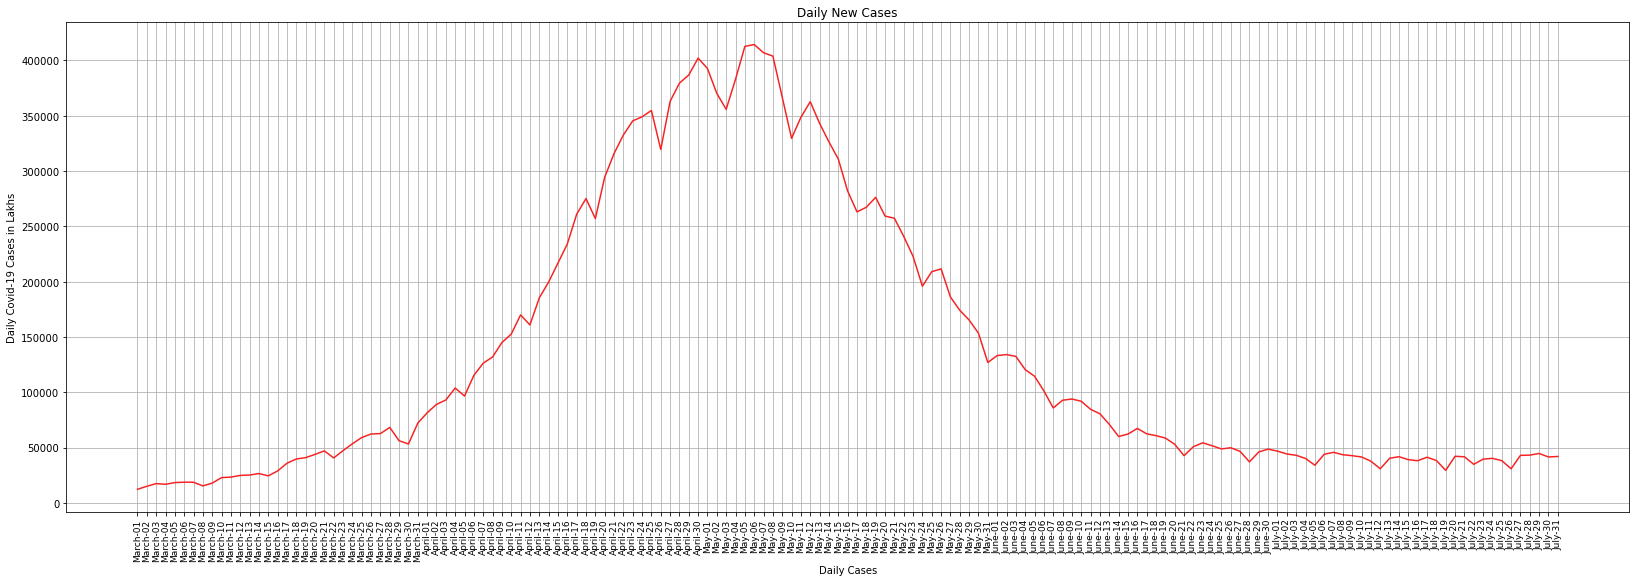

In [43]:
#setting the figure size and plotting graph
plt.figure(figsize=(28, 9))
plt.plot(df_Dailyc['month_day'], df_Dailyc['Daily Confirmed'], color='#f72323')
plt.xticks(rotation='vertical', size=9)
plt.xlabel('Daily Cases')
plt.ylabel('Daily Covid-19 Cases in Lakhs')
plt.title('Daily New Cases')
plt.grid(True)
plt.show()

#Grouping Month_day by Total Deceased Cases :

In [15]:
df_tdeaths = India_data.groupby('month_day', sort=False).sum()['Total Deceased'].reset_index()
df_tdeaths

,month_day,Total Deceased
0,March-01,156695
1,March-02,156793
2,March-03,156880
3,March-04,156993
4,March-05,157102
...,...,...
148,July-27,421464
149,July-28,422104
150,July-29,422653
151,July-30,423251


## Total Coronavirus Deaths in India

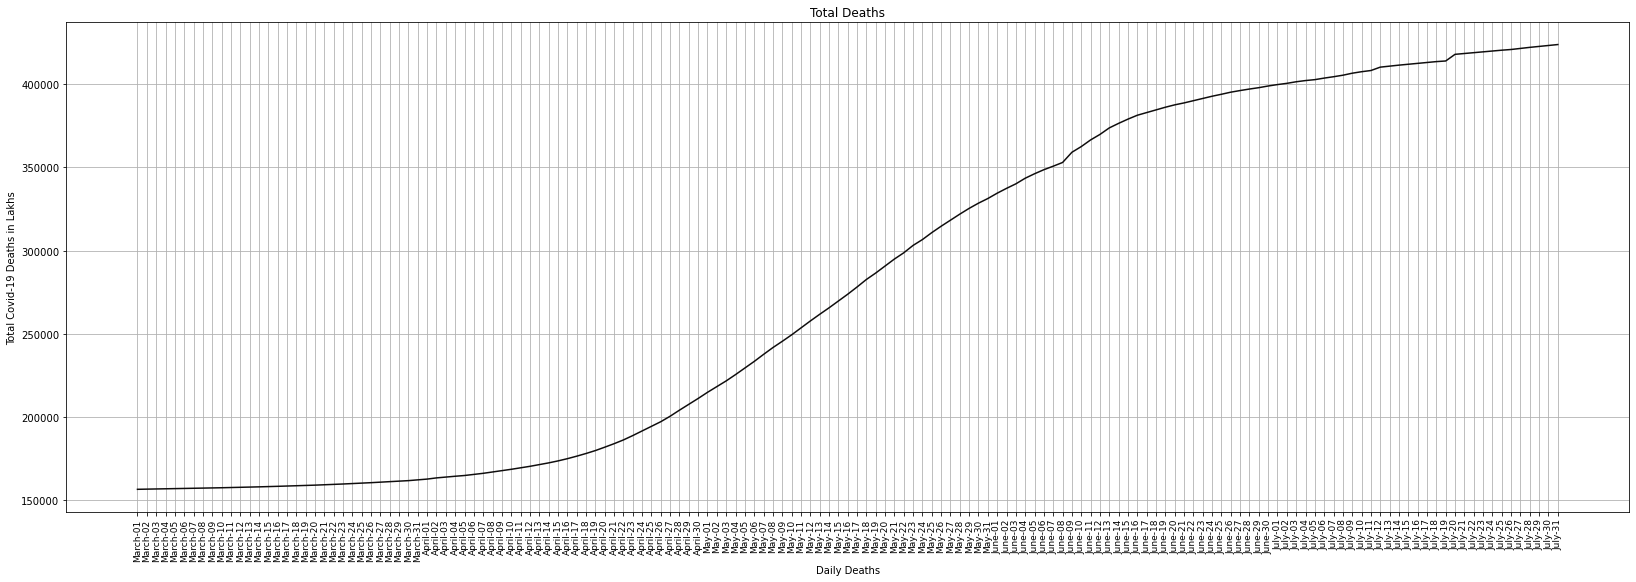

In [44]:
#setting the figure size and plotting graphs
plt.figure(figsize=(28, 9))
plt.plot(df_tdeaths['month_day'], df_tdeaths['Total Deceased'], color='#0f0d0d')
plt.xticks(rotation='vertical', size=9)
plt.xlabel('Daily Deaths')
plt.ylabel('Total Covid-19 Deaths in Lakhs')
plt.title('Total Deaths')
plt.grid(True)
plt.show()

#Grouping Month_day by Daily Deceased Cases :

In [17]:
df_dailyD = India_data.groupby('month_day', sort=False).sum()['Daily Deceased'].reset_index()
df_dailyD

,month_day,Daily Deceased
0,March-01,92
1,March-02,98
2,March-03,87
3,March-04,113
4,March-05,109
...,...,...
148,July-27,641
149,July-28,640
150,July-29,549
151,July-30,598


## Daily Deaths in India

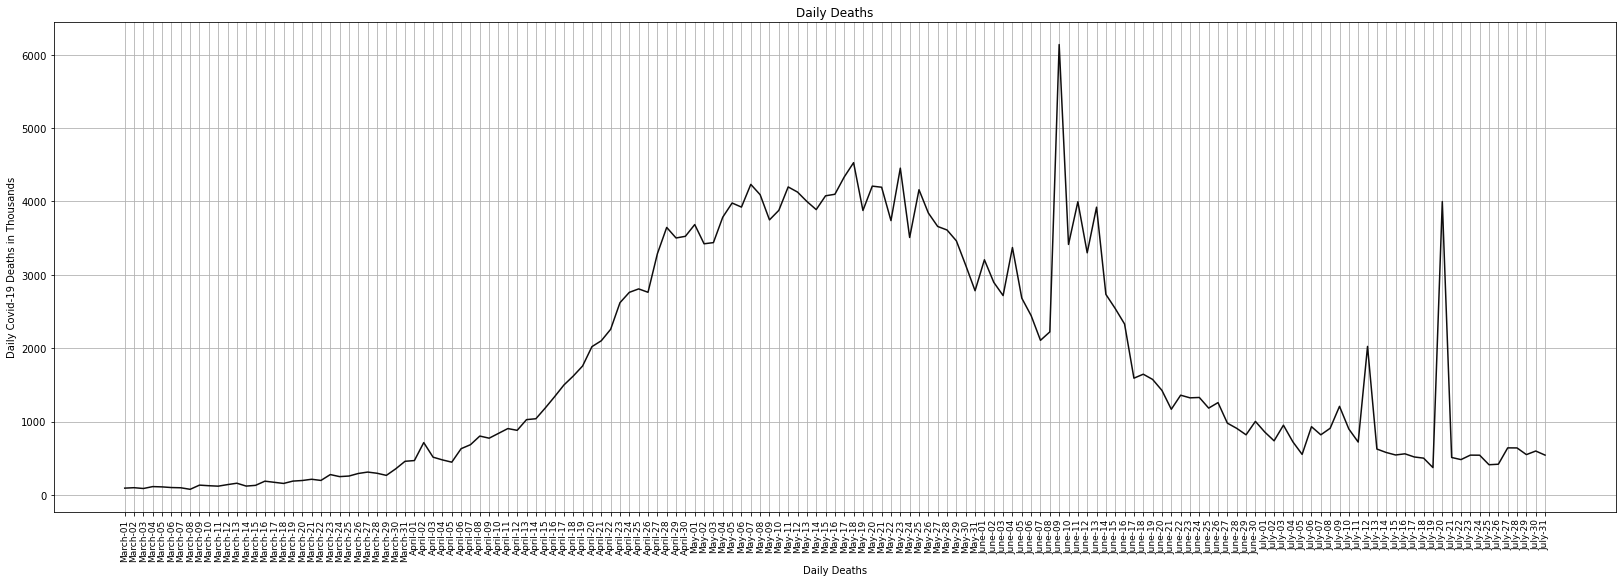

In [45]:
#setting the figure size and plotting graphs
plt.figure(figsize=(28, 9))
plt.plot(df_dailyD['month_day'], df_dailyD['Daily Deceased'], color='#0f0d0d')
plt.xticks(rotation='vertical', size=9)
plt.xlabel('Daily Deaths')
plt.ylabel('Daily Covid-19 Deaths in Thousands')
plt.title('Daily Deaths')
plt.grid(True)
plt.show()

#Grouping Month_day by Total Recovered Cases :

In [19]:
df_trecover = India_data.groupby('month_day', sort=False).sum()['Total Recovered'].reset_index()
df_trecover

,month_day,Total Recovered
0,March-01,10796873
1,March-02,10809986
2,March-03,10824057
3,March-04,10837845
4,March-05,10852031
...,...,...
148,July-27,30655426
149,July-28,30693963
150,July-29,30736078
151,July-30,30773398


## Total Recovered Cases in India

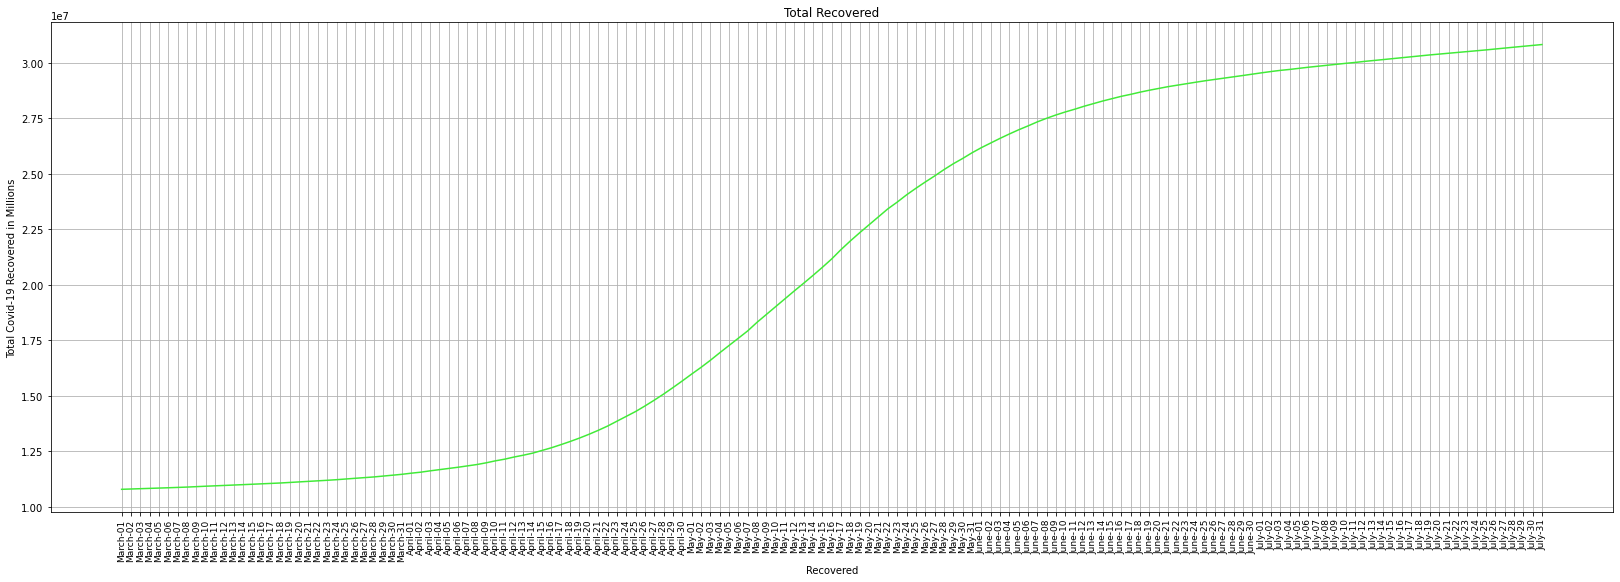

In [46]:
#setting the figure size and plotting graphs
plt.figure(figsize=(28, 9))
plt.plot(df_trecover['month_day'], df_trecover['Total Recovered'], color='#41eb38')
plt.xticks(rotation='vertical', size=9)
plt.xlabel('Recovered')
plt.ylabel('Total Covid-19 Recovered in Millions')
plt.title('Total Recovered')
plt.grid(True)
plt.show()

#Grouping Month_day by Daily Recovered Cases :

In [21]:
df_drecover = India_data.groupby('month_day', sort=False).sum()['Daily Recovered'].reset_index()
df_drecover

,month_day,Daily Recovered
0,March-01,12472
1,March-02,13113
2,March-03,14071
3,March-04,13788
4,March-05,14186
...,...,...
148,July-27,41653
149,July-28,38537
150,July-29,42115
151,July-30,37320


## Daily Recoveries in India

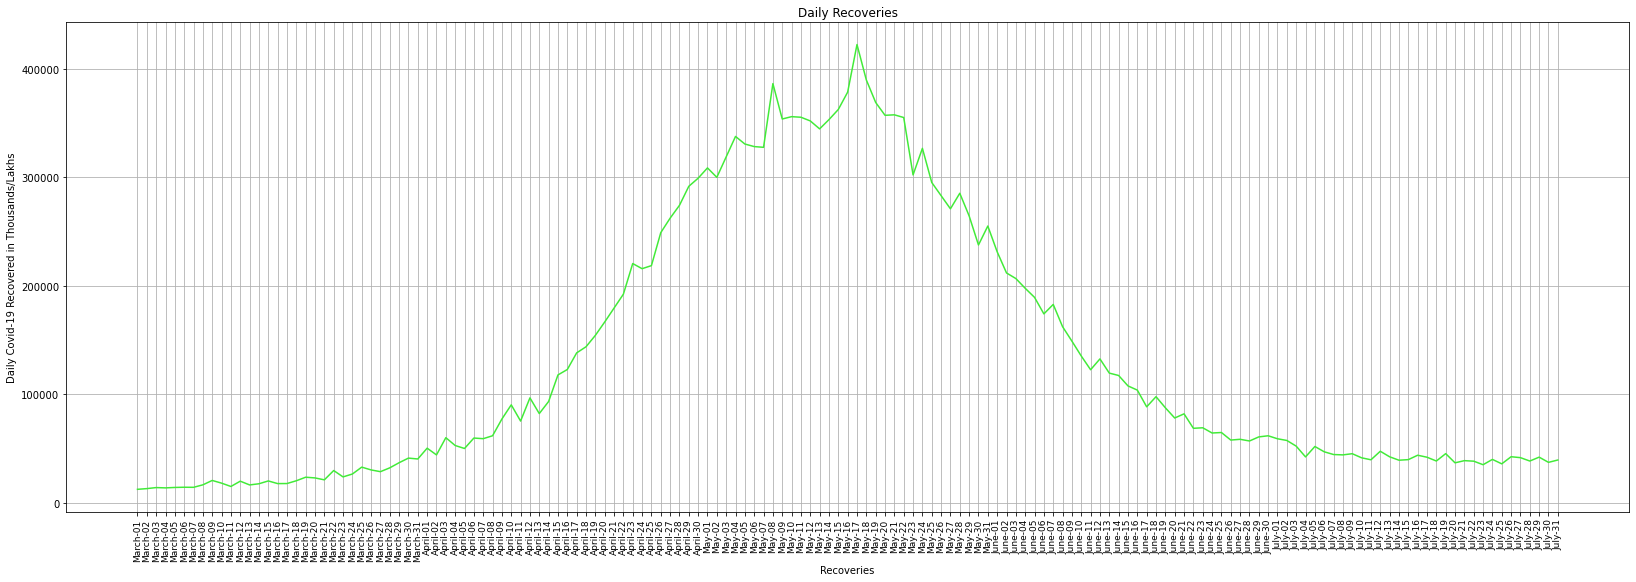

In [47]:
#setting the figure size and plotting graphs
plt.figure(figsize=(28, 9))
plt.plot(df_drecover['month_day'], df_drecover['Daily Recovered'], color='#41eb38')
plt.xticks(rotation='vertical', size=9)
plt.xlabel('Recoveries')
plt.ylabel('Daily Covid-19 Recovered in Thousands/Lakhs')
plt.title('Daily Recoveries')
plt.grid(True)
plt.show()

## Newly Infected vs. Newly Recovered in India

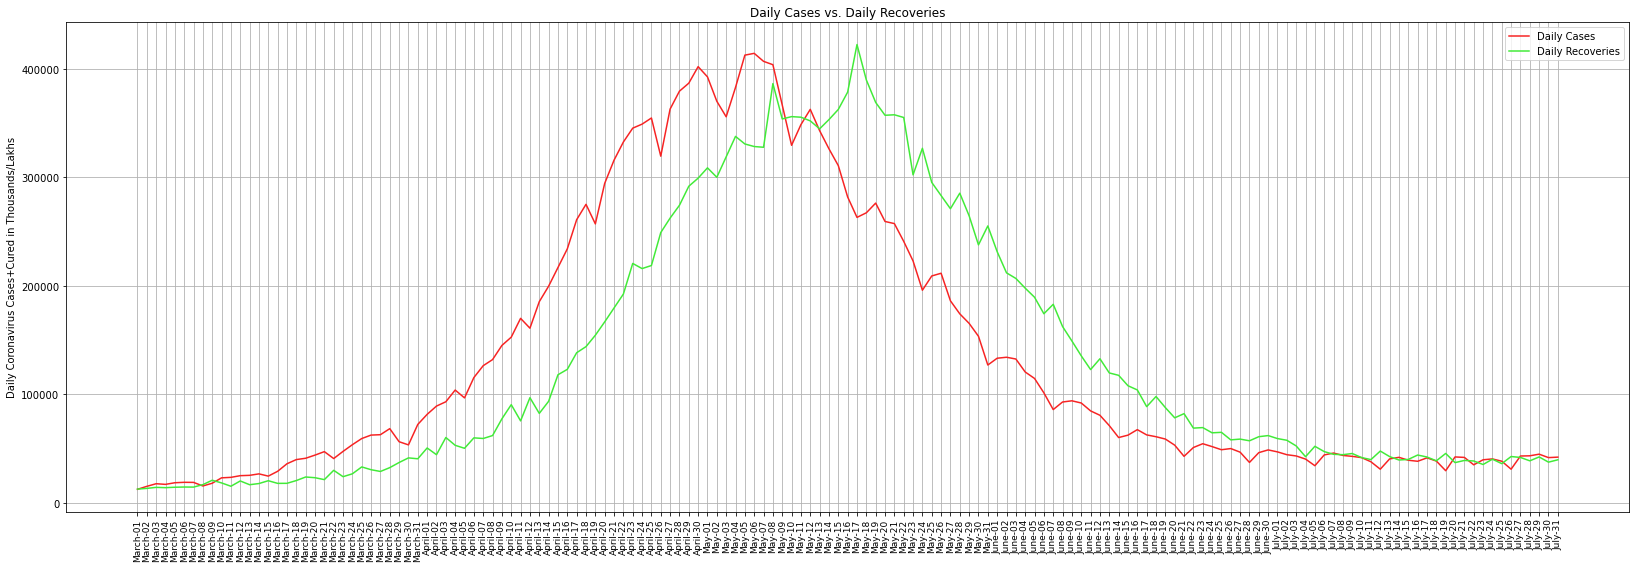

In [48]:
#setting the figure size and plotting graphs
plt.figure(figsize=(28, 9))
plt.plot(df_Dailyc['month_day'], df_Dailyc['Daily Confirmed'], color='#f72323', label='Daily Cases')
plt.plot(df_drecover['month_day'], df_drecover['Daily Recovered'], color='#41eb38', label='Daily Recoveries')
plt.xticks(rotation='vertical', size=9)
plt.ylabel('Daily Coronavirus Cases+Cured in Thousands/Lakhs')
plt.title('Daily Cases vs. Daily Recoveries')
plt.legend()
plt.grid(True)
plt.show()

# # Total Infected vs. Total Recovered in India

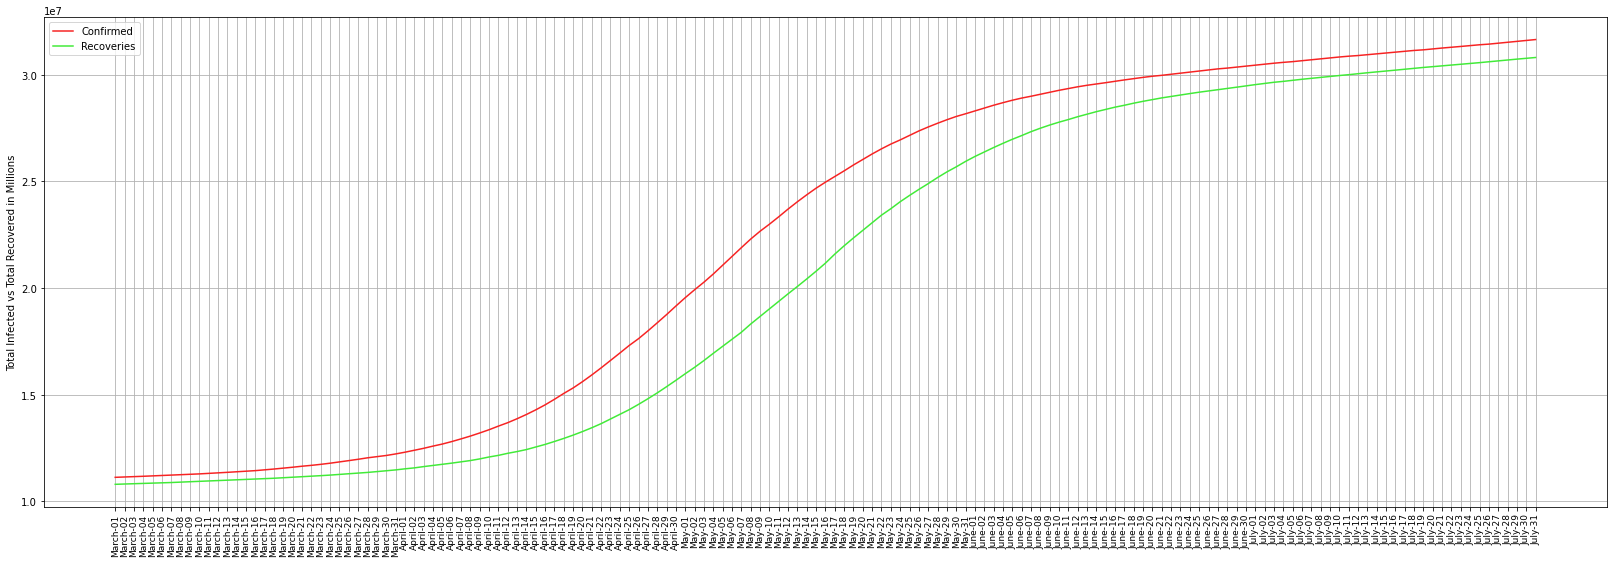

In [49]:
#setting the figure size and plotting graphs
plt.figure(figsize=(28, 9))
plt.plot(df_tconfirmed['month_day'], df_tconfirmed['Total Confirmed'], color='#f72323', label='Confirmed')
plt.plot(df_trecover['month_day'], df_trecover['Total Recovered'], color='#41eb38', label = 'Recoveries')
plt.xticks(rotation='vertical', size=9)
plt.ylabel('Total Infected vs Total Recovered in Millions')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
#Subtracting (Daily Confirmed - Daily Recovered)
New_df = df_Dailyc['Daily Confirmed'] - df_drecover['Daily Recovered']
New_df

0      -202
1      1885
2      3354
3      3036
4      4138
       ... 
148    1318
149    4628
150    2556
151    4179
152    2458
Length: 153, dtype: int64

#Adding New Column to DataFrame:

In [29]:
India_data['conf_Rec'] = New_df
India_data['conf_Rec']

0      -202
1      1885
2      3354
3      3036
4      4138
       ... 
148    1318
149    4628
150    2556
151    4179
152    2458
Name: conf_Rec, Length: 153, dtype: int64

In [30]:
India_data.head()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,month_day,conf_Rec
0,2021-03-01,01-03-2021,12270,11124248,12472,10796873,92,156695,March-01,-202
1,2021-03-02,02-03-2021,14998,11139246,13113,10809986,98,156793,March-02,1885
2,2021-03-03,03-03-2021,17425,11156671,14071,10824057,87,156880,March-03,3354
3,2021-03-04,04-03-2021,16824,11173495,13788,10837845,113,156993,March-04,3036
4,2021-03-05,05-03-2021,18324,11191819,14186,10852031,109,157102,March-05,4138


#Grouping month day by conf_Rec column:

In [32]:
df_react = India_data.groupby('month_day', sort=False).sum()['conf_Rec'].reset_index()
df_react

,month_day,conf_Rec
0,March-01,-202
1,March-02,1885
2,March-03,3354
3,March-04,3036
4,March-05,4138
...,...,...
148,July-27,1318
149,July-28,4628
150,July-29,2556
151,July-30,4179


# # (Daily Confirmed - Daily Recoveries) Plotting:

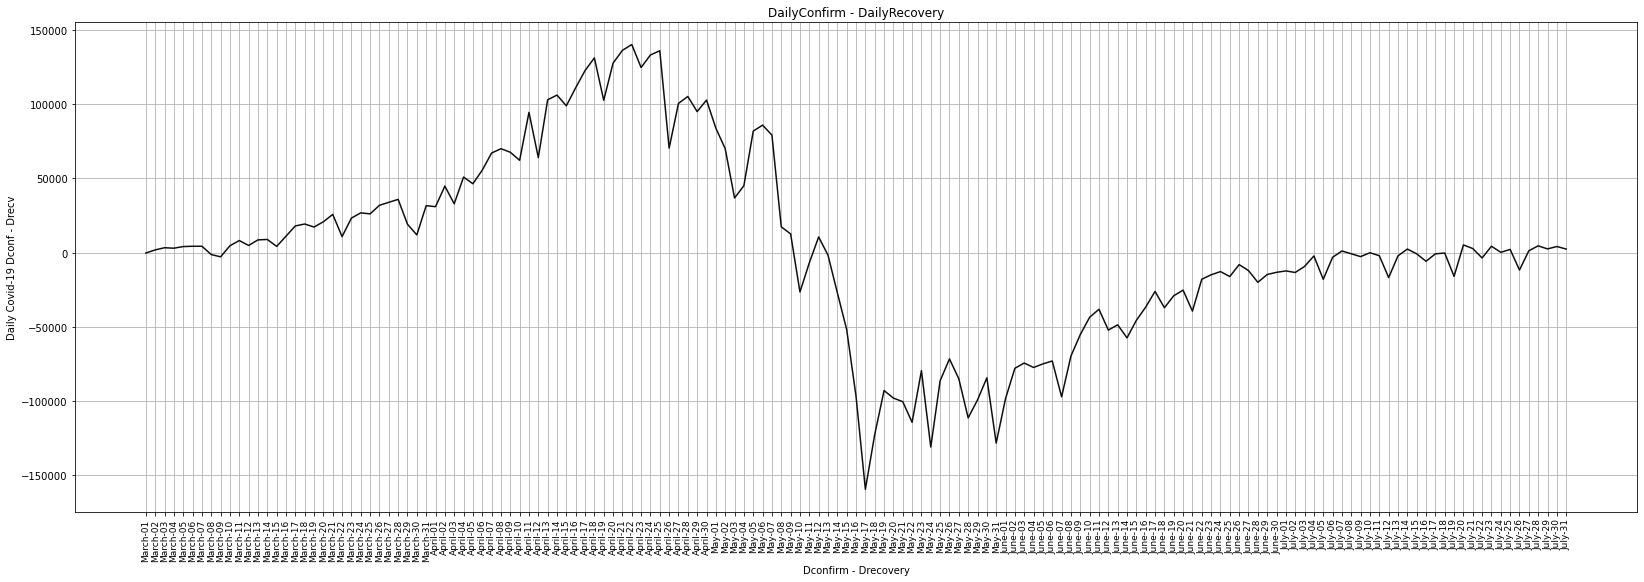

In [50]:
#setting the figure size and plotting graphs
plt.figure(figsize=(28, 9))
plt.plot(df_react['month_day'], df_react['conf_Rec'], color='#0f0d0d')
plt.xticks(rotation='vertical', size=9)
plt.xlabel('Dconfirm - Drecovery')
plt.ylabel('Daily Covid-19 Dconf - Drecv')
plt.title('DailyConfirm - DailyRecovery')
plt.grid(True)
plt.show()
